In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
twitter_train = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_training.csv")
twitter_val = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Project Dataset\Twitter\twitter_validation.csv")

In [3]:
twitter_train.head(2)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [4]:
twitter_val.head(2)

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [5]:
col = ["twitter_id", "entity", "sentiment", "content"]
twitter_train.columns = col
twitter_val.columns = col

In [6]:
twitter_train.head(2)

,twitter_id,entity,sentiment,content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [7]:
twitter_val.head(2)

,twitter_id,entity,sentiment,content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...


In [8]:
twitter_train.shape

(74681, 4)

In [9]:
twitter_train.duplicated().sum()

np.int64(2700)

In [10]:
twitter_train.drop_duplicates(inplace=True)
twitter_train.shape

(71981, 4)

In [11]:
twitter_train.isnull().sum().sum()

np.int64(326)

In [12]:
twitter_train.dropna(inplace=True)
twitter_train.shape

(71655, 4)

In [13]:
twitter_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   twitter_id  71655 non-null  int64 
 1   entity      71655 non-null  object
 2   sentiment   71655 non-null  object
 3   content     71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


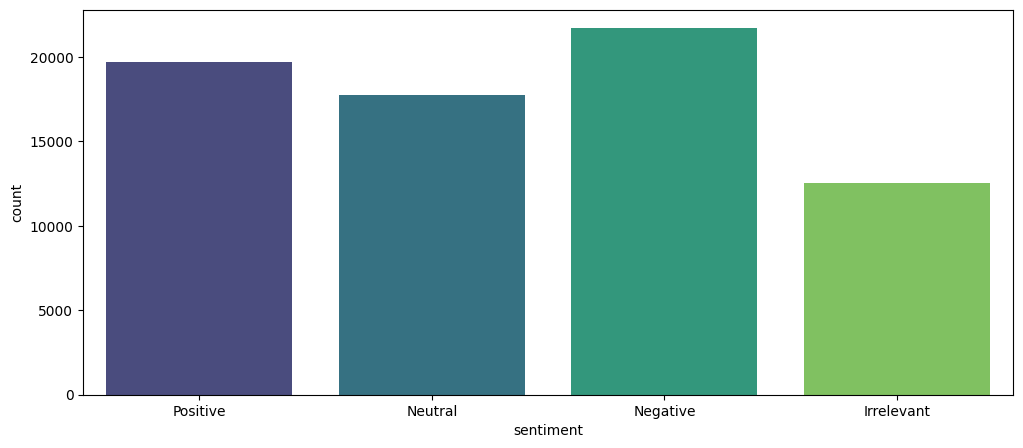

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data = twitter_train, x="sentiment", palette="viridis")
plt.show()

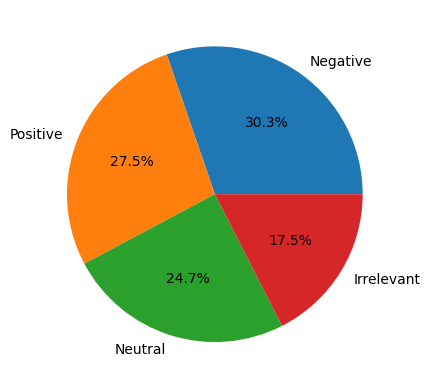

In [23]:
sentiment_count = twitter_train["sentiment"].value_counts()
plt.pie(sentiment_count, labels= sentiment_count.index, autopct="%1.1f%%")
plt.show()

In [24]:
twitter_train["lower"] = twitter_train["content"].astype(str).str.lower()

In [26]:
twitter_train["lower"] = [str(data) for data in twitter_train["lower"]]

In [31]:
import re
twitter_train["lower"] = twitter_train["lower"].apply(lambda x : re.sub('[^a-zA-Z]0-9]+', ' ', x))

In [32]:
twitter_train.head(2)

,twitter_id,entity,sentiment,content,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...


In [29]:
twitter_val["lower"] = twitter_val["content"].astype(str).str.lower()

In [30]:
twitter_val["lower"] = [str(data) for data in twitter_val["lower"]]

In [33]:
twitter_val["lower"] = twitter_val["lower"].apply(lambda x : re.sub('[^A-Za-z0-9]+', ' ', x))

In [34]:
twitter_val.head(3)

,twitter_id,entity,sentiment,content,lower
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
pos_wc = wc.generate(twitter_train[twitter_train["sentiment"]=="Positive"])